# **1. 개발 환경**

## 1.1 OS

In [54]:
import platform
print(platform.platform())

Windows-10-10.0.22000-SP0


## 1.2 Python version

In [55]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


## 1.3 Library

In [56]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 그래프 출력
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 사용 모델
from sklearn.ensemble import RandomForestRegressor

# **2. 데이터 로드**

In [57]:
total = pd.read_csv('한국가스공사_시간별 공급량_20181231.csv', encoding = 'cp949')

In [58]:
total.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


## 2.1 전처리

In [59]:
# 범주형 데이터 확인
total['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [60]:
# 숫자 데이터로 변경
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)

In [61]:
# 날짜 데이터 타입 확인
total['연월일'].dtype

dtype('O')

In [62]:
# 날짜 데이터 datetime 형식으로 변경
total['연월일'] = pd.to_datetime(total['연월일'])

In [63]:
# 날짜 데이터에서 연, 월, 일, 요일 데이터 생성
total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday

## 2.2 이상치 처리

In [64]:
total_a = total[total['구분'] == 0].reset_index(drop = True)
total_b = total[total['구분'] == 1].reset_index(drop = True)
total_c = total[total['구분'] == 2].reset_index(drop = True)
total_d = total[total['구분'] == 3].reset_index(drop = True)
total_e = total[total['구분'] == 4].reset_index(drop = True)
total_g = total[total['구분'] == 5].reset_index(drop = True)
total_h = total[total['구분'] == 6].reset_index(drop = True)

### 2.2.1 A 공급사

In [65]:
total_a.head()

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1


In [66]:
total_aa = pd.DataFrame(data = {'ds' : total_a["연월일"], 'y' : total_a['공급량']})
total_aa.head()

,ds,y
0,2013-01-01,2497.129
1,2013-01-01,2363.265
2,2013-01-01,2258.505
3,2013-01-01,2243.969
4,2013-01-01,2344.105


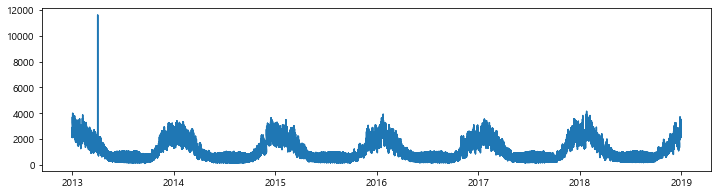

In [67]:
plt.figure(figsize = (12,3))
plt.plot(total_aa["ds"], total_aa["y"])
plt.show()

In [68]:
# 이상치 데이터 결측치 처리
total_aa[2230:2231]['y'] = np.nan

C:\Users\user\AppData\Local\Temp/ipykernel_15296/953497565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_aa[2230:2231]['y'] = np.nan


In [69]:
total_a['공급량' ] = total_aa['y']

### 2.2.2 B 공급사

In [70]:
total_bb = pd.DataFrame(data = {'ds' : total_b["연월일"], 'y' : total_b['공급량']})
total_bb.head()

,ds,y
0,2013-01-01,2169.093
1,2013-01-01,2051.733
2,2013-01-01,1923.253
3,2013-01-01,1927.253
4,2013-01-01,2047.333


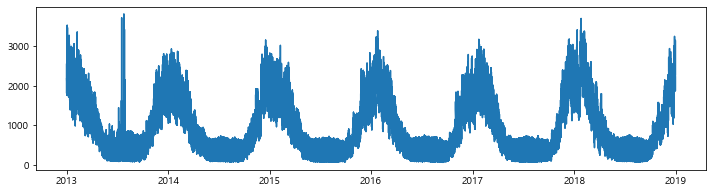

In [71]:
plt.figure(figsize = (12,3))
plt.plot(total_bb["ds"], total_bb["y"])
plt.show()

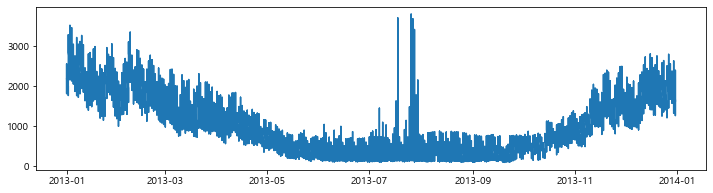

In [72]:
plt.figure(figsize = (12,3))
plt.plot(total_bb[total_b["year"] == 2013]['ds'], total_bb[total_b["year"] == 2013]["y"])
plt.show()

In [73]:
# 이상치 데이터 확인
total_bb[(total_b['year'] == 2013) & (total_b['month'] == 7) & (total_b['공급량'] > 1000) \
      | (total_b['year'] == 2018) & (total_b['공급량'] > 3550)]

,ds,y
4507,2013-07-07,1441.813
4555,2013-07-09,1086.749
4603,2013-07-11,1020.341
4747,2013-07-17,1620.277
4771,2013-07-18,3704.901
4891,2013-07-23,1133.597
4939,2013-07-25,1474.949
4963,2013-07-26,3798.613
4987,2013-07-27,3682.997
5011,2013-07-28,3412.565


In [74]:
# 이상치 데이터 인덱스 저장
outlier_b = total_bb[(total_b['year'] == 2013) & (total_b['month'] == 7) & (total_b['공급량'] > 1000) \
                  | (total_b['year'] == 2018) & (total_b['공급량'] > 3550)].index

In [75]:
# 이상치 데이터 결측치 처리
for i in outlier_b:
    total_bb[i:i+1]['y'] = np.nan

C:\Users\user\AppData\Local\Temp/ipykernel_15296/1939670366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_bb[i:i+1]['y'] = np.nan


In [76]:
total_b['공급량'] = total_bb['y']

### 2.2.3 G 공급사

In [77]:
total_gg = pd.DataFrame(data = {'ds' : total_g["연월일"], 'y' : total_g['공급량']})
total_gg.head()

,ds,y
0,2013-01-01,3560.365
1,2013-01-01,3354.245
2,2013-01-01,3115.757
3,2013-01-01,3034.237
4,2013-01-01,3050.469


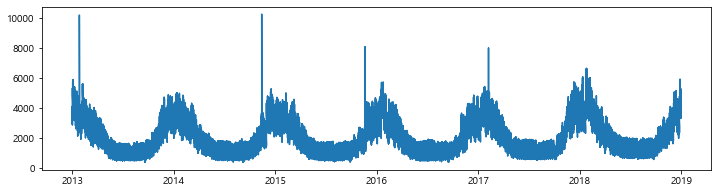

In [78]:
plt.figure(figsize = (12,3))
plt.plot(total_gg["ds"], total_gg["y"])
plt.show()

In [79]:
total_gg[total_gg['y'] > 7000]

,ds,y
647,2013-01-27,10207.077
16391,2014-11-14,10271.437
25309,2015-11-21,8086.693
35953,2017-02-07,8005.709


In [80]:
# 이상치 데이터 인덱스 저장
outlier_g = total_gg[total_gg['y'] > 7000].index
outlier_g

Int64Index([647, 16391, 25309, 35953], dtype='int64')

In [81]:
# 이상치 데이터 결측치 처리
for i in outlier_g:
    total_gg[i:i+1]['y'] = np.nan

C:\Users\user\AppData\Local\Temp/ipykernel_15296/2028540067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_gg[i:i+1]['y'] = np.nan


In [82]:
total_g['공급량'] = total_gg['y']

### 2.2.4 H 공급사

In [83]:
total_hh = pd.DataFrame(data = {'ds' : total_h["연월일"], 'y' : total_h['공급량']})
total_hh.head()

,ds,y
0,2013-01-01,562.964
1,2013-01-01,531.228
2,2013-01-01,496.276
3,2013-01-01,489.396
4,2013-01-01,535.420


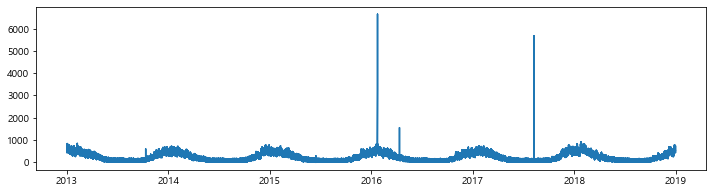

In [84]:
plt.figure(figsize = (12,3))
plt.plot(total_hh["ds"], total_hh["y"])
plt.show()

In [85]:
total_hh[total_hh['y'] > 1000]

,ds,y
26832,2016-01-24,3227.524
26833,2016-01-24,6644.788
28732,2016-04-12,1557.836
40355,2017-08-09,2620.516
40356,2017-08-09,5676.964


In [86]:
# 이상치 데이터 인덱스 저장 및 결측치 처리
outlier_h = total_hh[total_hh['y'] > 1000].index

for i in outlier_h:
    total_hh[i:i+1]['y'] = np.nan

C:\Users\user\AppData\Local\Temp/ipykernel_15296/1089873840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_hh[i:i+1]['y'] = np.nan


In [87]:
total_h['공급량'] = total_hh['y']

### 2.2.5 병합

In [88]:
total = pd.concat([total_a, total_b, total_c, total_d, total_e, total_g, total_h], ignore_index = True)
total.head()

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1


In [89]:
total.isna().sum()

연월일         0
시간          0
구분          0
공급량        24
year        0
month       0
day         0
weekday     0
dtype: int64

In [90]:
# 결측치 데이터를 그 이전의 값으로 채우는 'bfill' 적용
total = total.fillna(method='bfill')

In [91]:
total.isna().sum()

연월일        0
시간         0
구분         0
공급량        0
year       0
month      0
day        0
weekday    0
dtype: int64

### 2.2.6 train/validation set 분할

In [92]:
# 훈련에 사용할 train set, 점수 확인을 위한 validation set 분할 
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

In [93]:
train = total[total['year'].isin(train_years)]
val = total[total['year'].isin(val_years)]

In [94]:
# 독립변수, 종속변수 분할
features = ['구분', 'month', 'day', 'weekday', '시간']
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

# **3. 모델 생성 및 학습**

## 3.1 파라미터 선정

### 3.1.1 n_estimators : 트리 개수
랜덤 포레스트에 들어가는 의사결정나무 개수를 설정  
여러 트리 모델의 결과를 선형 결합해 최종 모델을 만드는데 트리 개수를 감소시키면 일반적으로 과대 적합 방지  
과대적합 방지를 위해 트리 수는 30으로 선택

In [95]:
# train 및 val 설명력 결과 저장
train_score = []
val_score = []

# n_estimators : 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x, train_y))
    val_score.append(rf.score(val_x, val_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["ValScore"] = val_score

In [96]:
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,ValScore
0,10,0.995,0.932
1,20,0.996,0.934
2,30,0.996,0.934
3,40,0.996,0.934
4,50,0.996,0.934
5,60,0.996,0.934
6,70,0.996,0.935
7,80,0.996,0.935
8,90,0.996,0.935
9,100,0.996,0.935


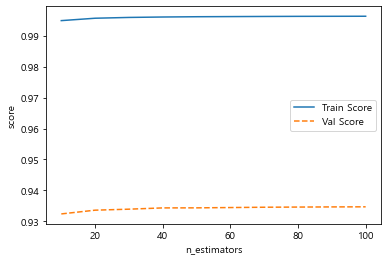

In [97]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, val_score, linestyle = "--", label = "Val Score")
plt.ylabel('score'); plt.xlabel("n_estimators")
plt.legend()
plt.show()

In [98]:
# 과대적합 방지를 위해 트리 수는 30으로 선택
n_estimators = 30

### 3.1.2 min_samples_leaf : 잎사귀 노드 최소 자료 수
최소 자료 수를 증가시키면 분리 조건이 엄격해져 과대적합이 방지됨  
하지만 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소  
val데이터 정확도 변화를 고려해 6 선택

In [99]:
# train 및 val 설명력 결과 저장
train_score = []
val_score = []

# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 30, random_state = 1234,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x, train_y))
    val_score.append(rf.score(val_x, val_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValScore"] = val_score

In [100]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValScore
0,1,0.996,0.934
1,2,0.989,0.935
2,3,0.984,0.936
3,4,0.980,0.937
4,5,0.978,0.937
5,6,0.976,0.936
6,7,0.974,0.936
7,8,0.973,0.936
8,9,0.972,0.936
9,10,0.971,0.936


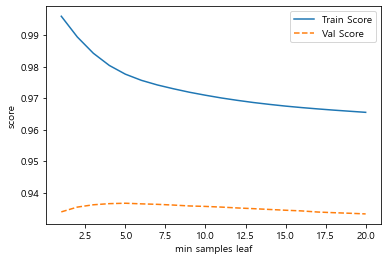

In [101]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, val_score, linestyle = "--", label = "Val Score")
plt.ylabel('score'); plt.xlabel("min samples leaf")
plt.legend()
plt.show()

In [102]:
# 잎사귀 노드 최소 자료 수 증가에 따라 설명력은 감소, 
# val데이터 정확도 변화를 고려해 6 선택
min_samples_leaf = 6

### 3.1.3 min_samples_split : 분리 노드 최소 자료 수
분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소  
train/val 데이터 성능 변화를 고려해 13 선택

In [103]:
# train 및 val 설명력 결과 저장
train_score = []
val_score = []

# min_samples_split : 분할하기 위한 노드 최소 자료 수
para_split = [n_split*2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 30, random_state = 1234,
                                min_samples_leaf = 6,
                                min_samples_split = v_min_samples_split)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x, train_y))
    val_score.append(rf.score(val_x, val_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValScore"] = val_score

In [104]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValScore
0,4,0.976,0.936
1,6,0.976,0.936
2,8,0.976,0.936
3,10,0.976,0.936
4,12,0.976,0.936
5,14,0.975,0.936
6,16,0.975,0.936
7,18,0.974,0.936
8,20,0.973,0.936
9,22,0.973,0.936


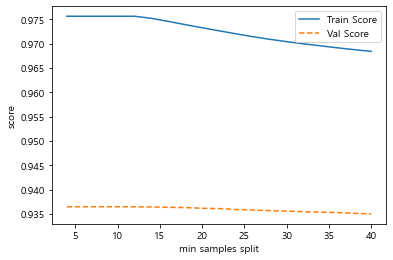

In [105]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, val_score, linestyle = "--", label = "Val Score")
plt.ylabel('score'); plt.xlabel("min samples split")
plt.legend()
plt.show()

In [106]:
# 분리 노드 최소 자료 수 증가에 따라 모델의 설명력 감소, 
# train/val 데이터 성능 변화를 고려해 13 선택
min_samples_split = 13

### 3.1.4 max_depth : 최대 깊이 변경에 따른 모델 성능
최대 깊이를 감소시키면 깊이 제약으로 과대적합이 방지됨  
최대 깊이 증가에 따라 모델의 설명력은 증가하며 train/val 데이터의 정확도 변화를 고려해 16 선택

In [107]:
# train 및 val 설명력 결과 저장
train_score = []
val_score = []

# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1, 21)]
for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 30, random_state = 1234,
                                min_samples_leaf = 6, min_samples_split = 13,
                                max_depth = v_max_depth)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x, train_y))
    val_score.append(rf.score(val_x, val_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValScore"] = val_score

In [108]:
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,ValScore
0,1,0.145,0.142
1,2,0.326,0.297
2,3,0.513,0.489
3,4,0.722,0.709
4,5,0.817,0.805
5,6,0.875,0.857
6,7,0.905,0.883
7,8,0.921,0.896
8,9,0.936,0.909
9,10,0.946,0.918


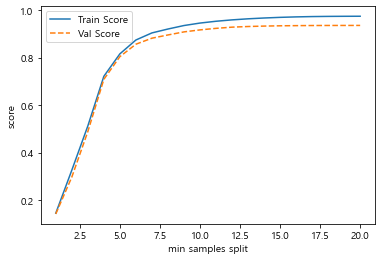

In [109]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, val_score, linestyle = "--", label = "Val Score")
plt.ylabel('score'); plt.xlabel("min samples split")
plt.legend()
plt.show()

In [110]:
# 분리 노드 최소 자료 수 증가에 따라 모델의 설명력 감소, 
# train/val 데이터 성능 변화를 고려해 16 선택
max_depth = 16

## 3.2 최적의 파라미터로 모델 훈련 및 검증

In [111]:
rf = RandomForestRegressor(max_depth = 16, min_samples_split = 13, 
                           min_samples_leaf = 6, n_estimators = 30, random_state = 1234)
rf.fit(train_x, train_y)

RandomForestRegressor(max_depth=16, min_samples_leaf=6, min_samples_split=13,
                      n_estimators=30, random_state=1234)

In [112]:
print("training set 점수 : {:.3f}".format(rf.score(train_x, train_y)))
print("val set 점수 : {:.3f}".format(rf.score(val_x, val_y)))

training set 점수 : 0.972
val set 점수 : 0.936


# **4. 추론(예측) 및 결과 제출**

## 4.1 훈련 데이터 생성

In [113]:
# 실제 훈련을 위한 데이터 생성
train_all_years = [2013,2014,2015,2016,2017,2018]

In [114]:
train_all = total[total['year'].isin(train_all_years)]

In [115]:
features = ['구분', 'month', 'day', 'weekday', '시간']
train_xx = train_all[features]
train_yy = train_all['공급량']

## 4.2 모델 훈련

In [116]:
rf = RandomForestRegressor(max_depth = 16, min_samples_split = 13, 
                           min_samples_leaf = 6, n_estimators = 30, random_state = 1234)
rf.fit(train_xx, train_yy)

RandomForestRegressor(max_depth=16, min_samples_leaf=6, min_samples_split=13,
                      n_estimators=30, random_state=1234)

## 4.3 결과 데이터 생성

In [118]:
test = pd.read_csv('1test.csv')
submission = pd.read_csv('sample_submission.csv')

In [119]:
test.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [120]:
submission.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0


In [121]:
test['일자'] = test['일자|시간|구분'].str.split(' ').str[0]
test['시간'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['구분'] = test['일자|시간|구분'].str.split(' ').str[2]

In [122]:
test['일자'] = pd.to_datetime(test['일자'])
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['weekday'] = test['일자'].dt.weekday

In [123]:
test['구분'] = test['구분'].map(d_map)

In [124]:
test_x = test[features]

In [125]:
test_x

,구분,month,day,weekday,시간
0,0,1,1,1,1
1,0,1,1,1,2
2,0,1,1,1,3
3,0,1,1,1,4
4,0,1,1,1,5
...,...,...,...,...,...
15115,6,3,31,6,20
15116,6,3,31,6,21
15117,6,3,31,6,22
15118,6,3,31,6,23


In [126]:
preds = rf.predict(test_x)

In [127]:
submission['공급량'] = preds

In [128]:
submission

,일자|시간|구분,공급량
0,2019-01-01 01 A,1800.306711
1,2019-01-01 02 A,1769.702054
2,2019-01-01 03 A,1702.814344
3,2019-01-01 04 A,1732.937863
4,2019-01-01 05 A,1812.339832
...,...,...
15115,2019-03-31 20 H,332.187240
15116,2019-03-31 21 H,336.235933
15117,2019-03-31 22 H,321.147503
15118,2019-03-31 23 H,293.627503


In [ ]:
submission.to_csv('baseline_final.csv', index = False)